## Preparation

In [2]:
%load_ext watermark
%watermark  -d -u -a 'Christine Hou' -v -p numpy,scipy,matplotlib,sklearn

Author: Christine Hou

Last updated: 2021-11-29

Python implementation: CPython
Python version       : 3.9.2
IPython version      : 7.28.0

numpy     : 1.19.5
scipy     : 1.6.1
matplotlib: 3.3.4
sklearn   : 0.0



In [3]:
import numpy as np
import pandas as pd
import scipy.stats
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV


# Model Part 1 - Using Feature.csv

## Input

In [3]:
# feature.csv
X1 = pd.read_csv("~/Desktop/STAT 451/STAT_451_Final_Project/code/features.csv",header = None)
y1 = pd.read_csv("~/Desktop/STAT 451/STAT_451_Final_Project/code/labels.csv",header = None).values.ravel().astype(int)

print('X1.shape:', X1.shape)
print('y1.shape:', y1.shape)


X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, 
                                                    test_size=0.3,
                                                    random_state=123,
                                                    shuffle=True,
                                                    stratify = y1)

print('X1_train.shape:', X1_train.shape)
print('y1_train.shape:', y1_train.shape)
print('X1_test.shape:', X1_test.shape)
print('y1_test.shape:', y1_test.shape)

X1_train_sub, X1_valid, y1_train_sub, y1_valid = \
    train_test_split(X1_train, y1_train, test_size=0.2,\
                     random_state=1, stratify=y1_train)

print('X1_valid.shape:', X1_valid.shape)
print('y1_valid.shape:', y1_valid.shape)

X1.shape: (4559, 512)
y1.shape: (4559,)
X1_train.shape: (3191, 512)
y1_train.shape: (3191,)
X1_test.shape: (1368, 512)
y1_test.shape: (1368,)
X1_valid.shape: (639, 512)
y1_valid.shape: (639,)


## 1. KNN (Base Model)

Text(0, 0.5, 'Error rate')

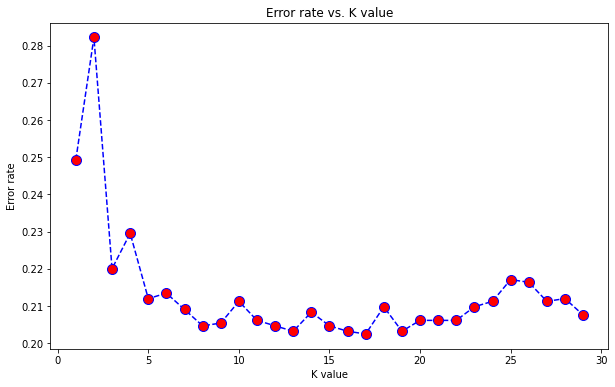

In [13]:
error = []

for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X1_train, y1_train)
    pred_i = knn.predict(X1_test)
    error.append(np.mean(pred_i != y1_test))

plt.figure(figsize = (10,6))
plt.plot(range(1,30),error,color = "blue",
        linestyle = "dashed",marker = "o",
        markerfacecolor = "red", markersize = 10)

plt.title("Error rate vs. K value")
plt.xlabel("K value")
plt.ylabel("Error rate")

In [14]:
# Find the index of minimum error in the error list
index = error.index(min(error))
k = index + 1
print(k)

17


In [15]:
# Find the k-value with lowest Error Rate - k
# for example, k = 3
knn_1 = KNeighborsClassifier(n_neighbors=k,
                             p =2,weights= "uniform")
knn_1.fit(X1_train,y1_train)
y_pred_test = knn_1.predict(X1_test)
print("Training Accuracy: %0.4f" % knn_1.score(X1_train, y1_train))
print("Validation Accuracy: %0.4f" % knn_1.score(X1_valid, y1_valid))
print("Test Accuracy: %0.4f" % knn_1.score(X1_test, y1_test))

Training Accuracy: 0.8088
Validation Accuracy: 0.7966
Test Accuracy: 0.7975


Tuning

In [16]:
params_knn = {
    'n_neighbors': np.arange(3,8),
    'leaf_size': np.arange(20,31),
    'p': np.arange(1,2),
    'weights': ('uniform', 'distance'),
    'metric': ('minkowski', 'chebyshev')
}

knn_new = RandomizedSearchCV(
    estimator=knn_1,
    param_distributions=params_knn,
    n_iter=20,
    cv=10,
    verbose=2,
    n_jobs=1,
    random_state = 123)

knn_new.fit(X1_train, y1_train)

knn_new.best_score_

Fitting 10 folds for each of 20 candidates, totalling 200 fits
[CV] END leaf_size=29, metric=minkowski, n_neighbors=7, p=1, weights=uniform; total time=   0.9s
[CV] END leaf_size=29, metric=minkowski, n_neighbors=7, p=1, weights=uniform; total time=   0.8s
[CV] END leaf_size=29, metric=minkowski, n_neighbors=7, p=1, weights=uniform; total time=   1.0s
[CV] END leaf_size=29, metric=minkowski, n_neighbors=7, p=1, weights=uniform; total time=   0.8s
[CV] END leaf_size=29, metric=minkowski, n_neighbors=7, p=1, weights=uniform; total time=   0.8s
[CV] END leaf_size=29, metric=minkowski, n_neighbors=7, p=1, weights=uniform; total time=   0.8s
[CV] END leaf_size=29, metric=minkowski, n_neighbors=7, p=1, weights=uniform; total time=   0.8s
[CV] END leaf_size=29, metric=minkowski, n_neighbors=7, p=1, weights=uniform; total time=   0.9s
[CV] END leaf_size=29, metric=minkowski, n_neighbors=7, p=1, weights=uniform; total time=   0.9s
[CV] END leaf_size=29, metric=minkowski, n_neighbors=7, p=1, wei

[CV] END leaf_size=30, metric=minkowski, n_neighbors=7, p=1, weights=distance; total time=   1.0s
[CV] END leaf_size=30, metric=minkowski, n_neighbors=7, p=1, weights=distance; total time=   1.0s
[CV] END leaf_size=30, metric=minkowski, n_neighbors=7, p=1, weights=distance; total time=   1.1s
[CV] END leaf_size=30, metric=minkowski, n_neighbors=7, p=1, weights=distance; total time=   1.1s
[CV] END leaf_size=30, metric=minkowski, n_neighbors=7, p=1, weights=distance; total time=   1.1s
[CV] END leaf_size=30, metric=minkowski, n_neighbors=7, p=1, weights=distance; total time=   1.2s
[CV] END leaf_size=24, metric=chebyshev, n_neighbors=3, p=1, weights=uniform; total time=   1.2s
[CV] END leaf_size=24, metric=chebyshev, n_neighbors=3, p=1, weights=uniform; total time=   1.1s
[CV] END leaf_size=24, metric=chebyshev, n_neighbors=3, p=1, weights=uniform; total time=   1.0s
[CV] END leaf_size=24, metric=chebyshev, n_neighbors=3, p=1, weights=uniform; total time=   1.0s
[CV] END leaf_size=24, m

[CV] END leaf_size=29, metric=minkowski, n_neighbors=3, p=1, weights=distance; total time=   0.8s
[CV] END leaf_size=26, metric=minkowski, n_neighbors=3, p=1, weights=uniform; total time=   0.7s
[CV] END leaf_size=26, metric=minkowski, n_neighbors=3, p=1, weights=uniform; total time=   0.7s
[CV] END leaf_size=26, metric=minkowski, n_neighbors=3, p=1, weights=uniform; total time=   0.7s
[CV] END leaf_size=26, metric=minkowski, n_neighbors=3, p=1, weights=uniform; total time=   0.8s
[CV] END leaf_size=26, metric=minkowski, n_neighbors=3, p=1, weights=uniform; total time=   0.7s
[CV] END leaf_size=26, metric=minkowski, n_neighbors=3, p=1, weights=uniform; total time=   0.8s
[CV] END leaf_size=26, metric=minkowski, n_neighbors=3, p=1, weights=uniform; total time=   0.7s
[CV] END leaf_size=26, metric=minkowski, n_neighbors=3, p=1, weights=uniform; total time=   0.7s
[CV] END leaf_size=26, metric=minkowski, n_neighbors=3, p=1, weights=uniform; total time=   0.7s
[CV] END leaf_size=26, metric

0.8260805250783699

In [18]:
knn_new.best_params_

{'weights': 'distance',
 'p': 1,
 'n_neighbors': 6,
 'metric': 'minkowski',
 'leaf_size': 27}

In [20]:
print("Training Accuracy: %0.4f" % knn_new.best_estimator_.score(X1_train, y1_train))
print("Validation Accuracy: %0.4f" % knn_new.best_estimator_.score(X1_valid, y1_valid))
print("Test Accuracy: %0.4f" % knn_new.best_estimator_.score(X1_test, y1_test))

Training Accuracy: 1.0000
Validation Accuracy: 1.0000
Test Accuracy: 0.8311


Evaluation - F1 Score

In [38]:
from sklearn.metrics import f1_score

y_true = y1_test
y_pred = knn_new.best_estimator_.predict(X1_test)

f1_score(y_true, y_pred, average="weighted")

0.8262312884896306

## 2. Decision Tree

Original Decision Tree

In [36]:
tree = DecisionTreeClassifier(random_state=123)
tree.fit(X1_train, y1_train)
print("Training Accuracy: %0.4f" % tree.score(X1_train, y1_train))
print("Validation Accuracy: %0.4f" % tree.score(X1_valid, y1_valid))
print("Test Accuracy: %0.4f" % tree.score(X1_test, y1_test))

Training Accuracy: 1.0000
Validation Accuracy: 1.0000
Test Accuracy: 0.8648


Tuning

In [37]:
params =  {
    'min_samples_split': scipy.stats.randint(2, 12),
    'min_impurity_decrease': scipy.stats.uniform(0.0, 0.5),
    'max_depth': [6, 16,18,20, None]
}


tree_new = RandomizedSearchCV(
    estimator=tree,
    param_distributions=params,
    n_iter=20,
    cv=10,
    verbose=2,
    n_jobs=1)

tree_new.fit(X1_train, y1_train)
tree_new.best_score_

Fitting 10 folds for each of 20 candidates, totalling 200 fits
[CV] END max_depth=None, min_impurity_decrease=0.0008733705337101161, min_samples_split=5; total time=   0.6s
[CV] END max_depth=None, min_impurity_decrease=0.0008733705337101161, min_samples_split=5; total time=   0.5s
[CV] END max_depth=None, min_impurity_decrease=0.0008733705337101161, min_samples_split=5; total time=   0.5s
[CV] END max_depth=None, min_impurity_decrease=0.0008733705337101161, min_samples_split=5; total time=   0.4s
[CV] END max_depth=None, min_impurity_decrease=0.0008733705337101161, min_samples_split=5; total time=   0.5s
[CV] END max_depth=None, min_impurity_decrease=0.0008733705337101161, min_samples_split=5; total time=   0.6s
[CV] END max_depth=None, min_impurity_decrease=0.0008733705337101161, min_samples_split=5; total time=   0.5s
[CV] END max_depth=None, min_impurity_decrease=0.0008733705337101161, min_samples_split=5; total time=   0.6s
[CV] END max_depth=None, min_impurity_decrease=0.00087337

[CV] END max_depth=16, min_impurity_decrease=0.4881978330721059, min_samples_split=11; total time=   0.1s
[CV] END max_depth=16, min_impurity_decrease=0.4881978330721059, min_samples_split=11; total time=   0.2s
[CV] END max_depth=20, min_impurity_decrease=0.1679028497377124, min_samples_split=5; total time=   0.3s
[CV] END max_depth=20, min_impurity_decrease=0.1679028497377124, min_samples_split=5; total time=   0.4s
[CV] END max_depth=20, min_impurity_decrease=0.1679028497377124, min_samples_split=5; total time=   0.3s
[CV] END max_depth=20, min_impurity_decrease=0.1679028497377124, min_samples_split=5; total time=   0.3s
[CV] END max_depth=20, min_impurity_decrease=0.1679028497377124, min_samples_split=5; total time=   0.2s
[CV] END max_depth=20, min_impurity_decrease=0.1679028497377124, min_samples_split=5; total time=   0.2s
[CV] END max_depth=20, min_impurity_decrease=0.1679028497377124, min_samples_split=5; total time=   0.3s
[CV] END max_depth=20, min_impurity_decrease=0.167902

[CV] END max_depth=16, min_impurity_decrease=0.3950977306117766, min_samples_split=11; total time=   0.1s
[CV] END max_depth=16, min_impurity_decrease=0.3950977306117766, min_samples_split=11; total time=   0.1s
[CV] END max_depth=16, min_impurity_decrease=0.3950977306117766, min_samples_split=11; total time=   0.1s
[CV] END max_depth=20, min_impurity_decrease=0.08201369380434637, min_samples_split=5; total time=   0.3s
[CV] END max_depth=20, min_impurity_decrease=0.08201369380434637, min_samples_split=5; total time=   0.3s
[CV] END max_depth=20, min_impurity_decrease=0.08201369380434637, min_samples_split=5; total time=   0.3s
[CV] END max_depth=20, min_impurity_decrease=0.08201369380434637, min_samples_split=5; total time=   0.3s
[CV] END max_depth=20, min_impurity_decrease=0.08201369380434637, min_samples_split=5; total time=   0.3s
[CV] END max_depth=20, min_impurity_decrease=0.08201369380434637, min_samples_split=5; total time=   0.3s
[CV] END max_depth=20, min_impurity_decrease=0

0.8771600705329154

In [39]:
tree_new.best_params_

{'max_depth': None,
 'min_impurity_decrease': 0.0008733705337101161,
 'min_samples_split': 5}

In [40]:
print("Training Accuracy: %0.4f" % tree_new.best_estimator_.score(X1_train, y1_train))
print("Validation Accuracy: %0.4f" % tree_new.best_estimator_.score(X1_valid, y1_valid))
print("Test Accuracy: %0.4f" % tree_new.best_estimator_.score(X1_test, y1_test))

Training Accuracy: 0.9693
Validation Accuracy: 0.9750
Test Accuracy: 0.8699


Evaluation - F1 Score

In [43]:
y_true = y1_test
y_pred = tree_new.best_estimator_.predict(X1_test)

f1_score(y_true, y_pred, average="weighted")

0.8697474023785465

## 3. Random Forest

Original Random Forest

In [44]:
forest = RandomForestClassifier(n_estimators=100,
                                random_state=123)

forest.fit(X1_train, y1_train)
    
print("Training Accuracy: %0.4f" % forest.score(X1_train, y1_train))
print("Validation Accuracy: %0.4f" % forest.score(X1_valid, y1_valid))
print("Test Accuracy: %0.4f" % forest.score(X1_test, y1_test))

Training Accuracy: 1.0000
Validation Accuracy: 1.0000
Test Accuracy: 0.9072


Tuning

In [45]:
params =  {
    'min_samples_split': scipy.stats.randint(2, 12),
    'min_impurity_decrease': scipy.stats.uniform(0.0, 0.5),
    'max_depth': [6, 16,18,20, None]
}

forest_new = RandomizedSearchCV(
    estimator=forest,
    param_distributions=params,
    n_iter=20,
    cv=10,
    verbose=2,
    n_jobs=1)

forest_new.fit(X1_train, y1_train)

forest_new.best_score_

Fitting 10 folds for each of 20 candidates, totalling 200 fits
[CV] END max_depth=20, min_impurity_decrease=0.09573987326986477, min_samples_split=4; total time=   0.9s
[CV] END max_depth=20, min_impurity_decrease=0.09573987326986477, min_samples_split=4; total time=   0.8s
[CV] END max_depth=20, min_impurity_decrease=0.09573987326986477, min_samples_split=4; total time=   0.8s
[CV] END max_depth=20, min_impurity_decrease=0.09573987326986477, min_samples_split=4; total time=   0.8s
[CV] END max_depth=20, min_impurity_decrease=0.09573987326986477, min_samples_split=4; total time=   0.8s
[CV] END max_depth=20, min_impurity_decrease=0.09573987326986477, min_samples_split=4; total time=   0.8s
[CV] END max_depth=20, min_impurity_decrease=0.09573987326986477, min_samples_split=4; total time=   0.8s
[CV] END max_depth=20, min_impurity_decrease=0.09573987326986477, min_samples_split=4; total time=   0.8s
[CV] END max_depth=20, min_impurity_decrease=0.09573987326986477, min_samples_split=4; to

[CV] END max_depth=20, min_impurity_decrease=0.38438107549422335, min_samples_split=7; total time=   0.4s
[CV] END max_depth=20, min_impurity_decrease=0.38438107549422335, min_samples_split=7; total time=   0.6s
[CV] END max_depth=20, min_impurity_decrease=0.38438107549422335, min_samples_split=7; total time=   0.5s
[CV] END max_depth=16, min_impurity_decrease=0.2269598010512256, min_samples_split=4; total time=   0.5s
[CV] END max_depth=16, min_impurity_decrease=0.2269598010512256, min_samples_split=4; total time=   0.5s
[CV] END max_depth=16, min_impurity_decrease=0.2269598010512256, min_samples_split=4; total time=   0.4s
[CV] END max_depth=16, min_impurity_decrease=0.2269598010512256, min_samples_split=4; total time=   0.5s
[CV] END max_depth=16, min_impurity_decrease=0.2269598010512256, min_samples_split=4; total time=   0.4s
[CV] END max_depth=16, min_impurity_decrease=0.2269598010512256, min_samples_split=4; total time=   0.5s
[CV] END max_depth=16, min_impurity_decrease=0.22695

[CV] END max_depth=16, min_impurity_decrease=0.40505389900050426, min_samples_split=4; total time=   0.4s
[CV] END max_depth=16, min_impurity_decrease=0.40505389900050426, min_samples_split=4; total time=   0.4s
[CV] END max_depth=16, min_impurity_decrease=0.40505389900050426, min_samples_split=4; total time=   0.5s
[CV] END max_depth=16, min_impurity_decrease=0.40505389900050426, min_samples_split=4; total time=   0.5s
[CV] END max_depth=16, min_impurity_decrease=0.40505389900050426, min_samples_split=4; total time=   0.5s
[CV] END max_depth=6, min_impurity_decrease=0.17916035448164308, min_samples_split=2; total time=   0.5s
[CV] END max_depth=6, min_impurity_decrease=0.17916035448164308, min_samples_split=2; total time=   0.6s
[CV] END max_depth=6, min_impurity_decrease=0.17916035448164308, min_samples_split=2; total time=   0.5s
[CV] END max_depth=6, min_impurity_decrease=0.17916035448164308, min_samples_split=2; total time=   0.5s
[CV] END max_depth=6, min_impurity_decrease=0.1791

0.8649363244514106

In [46]:
forest_new.best_params_

{'max_depth': 20,
 'min_impurity_decrease': 0.12529098612122003,
 'min_samples_split': 3}

In [47]:
print("Training Accuracy: %0.4f" % forest_new.best_estimator_.score(X1_train, y1_train))
print("Validation Accuracy: %0.4f" % forest_new.best_estimator_.score(X1_valid, y1_valid))
print("Test Accuracy: %0.4f" % forest_new.best_estimator_.score(X1_test, y1_test))

Training Accuracy: 0.8696
Validation Accuracy: 0.8701
Test Accuracy: 0.8699


Evaluation - F1 score 

In [50]:
y_true = y1_test
y_pred = forest_new.best_estimator_.predict(X1_test)

f1_score(y_true,y_pred,average ="weighted")

0.8698264905295465

# Model Part 2 : Using raw_image.csv

## Input

In [4]:
# raw_images.csv
X2 = pd.read_csv("~/Desktop/STAT 451/STAT_451_Final_Project/code/raw_images.csv",header = None)
y2= pd.read_csv("~/Desktop/STAT 451/STAT_451_Final_Project/code/labels.csv",header = None).values.ravel().astype(int)

print('X2.shape:', X2.shape)
print('y2.shape:', y2.shape)


X2.shape: (4559, 30000)
y2.shape: (4559,)


In [5]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, 
                                                    test_size=0.3,
                                                    random_state=123,
                                                    shuffle=True,
                                                    stratify = y2)

print('X2_train.shape:', X2_train.shape)
print('y2_train.shape:', y2_train.shape)
print('X2_test.shape:', X2_test.shape)
print('y2_test.shape:', y2_test.shape)

X2_train.shape: (3191, 30000)
y2_train.shape: (3191,)
X2_test.shape: (1368, 30000)
y2_test.shape: (1368,)


In [6]:
X2_train_sub, X2_valid, y2_train_sub, y2_valid = \
    train_test_split(X2_train, y2_train, test_size=0.2,\
                     random_state=1, stratify=y2_train)

print('X1_valid.shape:', X2_valid.shape)
print('y1_valid.shape:', y2_valid.shape)

X1_valid.shape: (639, 30000)
y1_valid.shape: (639,)


## 1. KNN (Base Model)

Text(0, 0.5, 'Error rate')

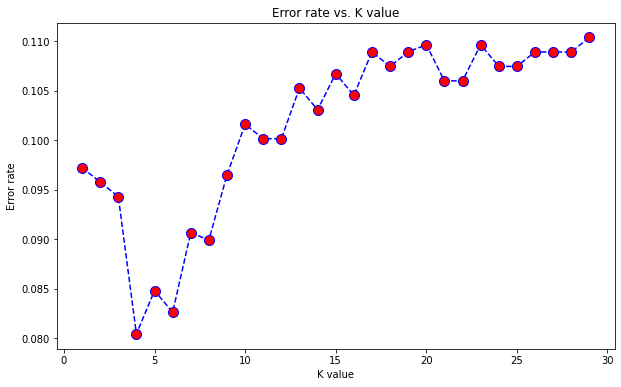

In [7]:
error2 = []

for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X2_train, y2_train)
    pred_i = knn.predict(X2_test)
    error2.append(np.mean(pred_i != y2_test))

plt.figure(figsize = (10,6))
plt.plot(range(1,30),error2,color = "blue",
        linestyle = "dashed",marker = "o",
        markerfacecolor = "red", markersize = 10)

plt.title("Error rate vs. K value")
plt.xlabel("K value")
plt.ylabel("Error rate")

In [8]:
# Find the index of minimum error in the error list
index2 = error2.index(min(error2))
k2 = index2 + 1
print(k2)

4


In [9]:
# Find the k-value with lowest Error Rate - k
# for example, k = 3
knn_2 = KNeighborsClassifier(n_neighbors=k2,
                             p =2,weights= "uniform")
knn_2.fit(X2_train,y2_train)
y_pred_test = knn_2.predict(X2_test)
print("Training Accuracy: %0.4f" % knn_2.score(X2_train, y2_train))
print("Validation Accuracy: %0.4f" % knn_2.score(X2_valid, y2_valid))
print("Test Accuracy: %0.4f" % knn_2.score(X2_test, y2_test))

Training Accuracy: 0.9389
Validation Accuracy: 0.9327
Test Accuracy: 0.9196


Tuning

In [24]:
params_knn = {
    'n_neighbors': np.arange(3,8),
    'leaf_size': np.arange(20,31),
    'p': np.arange(1,2),
    'weights': ('uniform', 'distance'),
    'metric': ('minkowski', 'chebyshev')
}

knn_new2 = RandomizedSearchCV(
    estimator=knn_2,
    param_distributions=params_knn,
    n_iter=20,
    cv=10,
    verbose=2,
    n_jobs=1,
    random_state = 123)

knn_new2.fit(X2_train, y2_train)

knn_new2.best_score_

Fitting 10 folds for each of 20 candidates, totalling 200 fits
[CV] END leaf_size=29, metric=minkowski, n_neighbors=7, p=1, weights=uniform; total time= 1.3min
[CV] END leaf_size=29, metric=minkowski, n_neighbors=7, p=1, weights=uniform; total time= 1.1min
[CV] END leaf_size=29, metric=minkowski, n_neighbors=7, p=1, weights=uniform; total time= 1.0min
[CV] END leaf_size=29, metric=minkowski, n_neighbors=7, p=1, weights=uniform; total time= 1.0min
[CV] END leaf_size=29, metric=minkowski, n_neighbors=7, p=1, weights=uniform; total time=  59.2s
[CV] END leaf_size=29, metric=minkowski, n_neighbors=7, p=1, weights=uniform; total time= 1.1min
[CV] END leaf_size=29, metric=minkowski, n_neighbors=7, p=1, weights=uniform; total time=  54.4s
[CV] END leaf_size=29, metric=minkowski, n_neighbors=7, p=1, weights=uniform; total time=  54.7s
[CV] END leaf_size=29, metric=minkowski, n_neighbors=7, p=1, weights=uniform; total time=  57.4s
[CV] END leaf_size=29, metric=minkowski, n_neighbors=7, p=1, wei

[CV] END leaf_size=30, metric=minkowski, n_neighbors=7, p=1, weights=distance; total time=  50.0s
[CV] END leaf_size=30, metric=minkowski, n_neighbors=7, p=1, weights=distance; total time=  49.6s
[CV] END leaf_size=30, metric=minkowski, n_neighbors=7, p=1, weights=distance; total time=  58.4s
[CV] END leaf_size=30, metric=minkowski, n_neighbors=7, p=1, weights=distance; total time=  49.7s
[CV] END leaf_size=30, metric=minkowski, n_neighbors=7, p=1, weights=distance; total time=  49.0s
[CV] END leaf_size=30, metric=minkowski, n_neighbors=7, p=1, weights=distance; total time=  48.6s
[CV] END leaf_size=24, metric=chebyshev, n_neighbors=3, p=1, weights=uniform; total time=  53.9s
[CV] END leaf_size=24, metric=chebyshev, n_neighbors=3, p=1, weights=uniform; total time= 1.2min
[CV] END leaf_size=24, metric=chebyshev, n_neighbors=3, p=1, weights=uniform; total time=  52.2s
[CV] END leaf_size=24, metric=chebyshev, n_neighbors=3, p=1, weights=uniform; total time=  51.7s
[CV] END leaf_size=24, m

[CV] END leaf_size=29, metric=minkowski, n_neighbors=3, p=1, weights=distance; total time=  43.1s
[CV] END leaf_size=26, metric=minkowski, n_neighbors=3, p=1, weights=uniform; total time=  45.5s
[CV] END leaf_size=26, metric=minkowski, n_neighbors=3, p=1, weights=uniform; total time=  43.7s
[CV] END leaf_size=26, metric=minkowski, n_neighbors=3, p=1, weights=uniform; total time=  43.2s
[CV] END leaf_size=26, metric=minkowski, n_neighbors=3, p=1, weights=uniform; total time=  43.0s
[CV] END leaf_size=26, metric=minkowski, n_neighbors=3, p=1, weights=uniform; total time=  43.3s
[CV] END leaf_size=26, metric=minkowski, n_neighbors=3, p=1, weights=uniform; total time=  55.6s
[CV] END leaf_size=26, metric=minkowski, n_neighbors=3, p=1, weights=uniform; total time=  43.8s
[CV] END leaf_size=26, metric=minkowski, n_neighbors=3, p=1, weights=uniform; total time=  47.1s
[CV] END leaf_size=26, metric=minkowski, n_neighbors=3, p=1, weights=uniform; total time= 1.1min
[CV] END leaf_size=26, metric

0.9150773902821318

In [25]:
knn_new2.best_params_

{'weights': 'distance',
 'p': 1,
 'n_neighbors': 6,
 'metric': 'minkowski',
 'leaf_size': 27}

In [ ]:
print("Training Accuracy: %0.4f" % knn_new2.best_estimator_.score(X2_train, y2_train))
print("Validation Accuracy: %0.4f" % knn_new2.best_estimator_.score(X2_valid, y2_valid))
print("Test Accuracy: %0.4f" % knn_new2.best_estimator_.score(X2_test, y2_test))

Evaluation

In [ ]:
y_true = y2_test
y_pred = knn_new2.best_estimator_.predict(X2_test)
f1_score(y_true,y_pred,average = "weighted)

## 2. Decision Tree

Original 

In [10]:
tree2 = DecisionTreeClassifier(random_state=123)
tree2.fit(X2_train, y2_train)
print("Training Accuracy: %0.4f" % tree2.score(X2_train, y2_train))
print("Validation Accuracy: %0.4f" % tree2.score(X2_valid, y2_valid))
print("Test Accuracy: %0.4f" % tree2.score(X2_test, y2_test))

Training Accuracy: 1.0000
Validation Accuracy: 1.0000
Test Accuracy: 0.8787


Tuning

In [12]:
params =  {
    'min_samples_split': scipy.stats.randint(2, 12),
    'min_impurity_decrease': scipy.stats.uniform(0.0, 0.5),
    'max_depth': [6, 16,18,20, None]
}


tree_new2 = RandomizedSearchCV(
    estimator=tree2,
    param_distributions=params,
    n_iter=20,
    cv=10,
    verbose=2,
    n_jobs=1)

tree_new2.fit(X2_train, y2_train)
tree_new2.best_score_

Fitting 10 folds for each of 20 candidates, totalling 200 fits
[CV] END max_depth=20, min_impurity_decrease=0.371334142447571, min_samples_split=2; total time=  14.3s
[CV] END max_depth=20, min_impurity_decrease=0.371334142447571, min_samples_split=2; total time=  10.0s
[CV] END max_depth=20, min_impurity_decrease=0.371334142447571, min_samples_split=2; total time=   8.5s
[CV] END max_depth=20, min_impurity_decrease=0.371334142447571, min_samples_split=2; total time=   7.9s
[CV] END max_depth=20, min_impurity_decrease=0.371334142447571, min_samples_split=2; total time=   6.0s
[CV] END max_depth=20, min_impurity_decrease=0.371334142447571, min_samples_split=2; total time=   5.3s
[CV] END max_depth=20, min_impurity_decrease=0.371334142447571, min_samples_split=2; total time=   5.4s
[CV] END max_depth=20, min_impurity_decrease=0.371334142447571, min_samples_split=2; total time=   5.3s
[CV] END max_depth=20, min_impurity_decrease=0.371334142447571, min_samples_split=2; total time=   5.4s
[

[CV] END max_depth=18, min_impurity_decrease=0.36600091751582814, min_samples_split=7; total time=   8.2s
[CV] END max_depth=18, min_impurity_decrease=0.36600091751582814, min_samples_split=7; total time=   6.4s
[CV] END max_depth=16, min_impurity_decrease=0.06064291939776573, min_samples_split=7; total time=  15.2s
[CV] END max_depth=16, min_impurity_decrease=0.06064291939776573, min_samples_split=7; total time=  16.0s
[CV] END max_depth=16, min_impurity_decrease=0.06064291939776573, min_samples_split=7; total time=  15.4s
[CV] END max_depth=16, min_impurity_decrease=0.06064291939776573, min_samples_split=7; total time=  14.8s
[CV] END max_depth=16, min_impurity_decrease=0.06064291939776573, min_samples_split=7; total time=  14.4s
[CV] END max_depth=16, min_impurity_decrease=0.06064291939776573, min_samples_split=7; total time=  14.4s
[CV] END max_depth=16, min_impurity_decrease=0.06064291939776573, min_samples_split=7; total time=  14.7s
[CV] END max_depth=16, min_impurity_decrease=0

[CV] END max_depth=20, min_impurity_decrease=0.23180152584616354, min_samples_split=5; total time=  10.9s
[CV] END max_depth=20, min_impurity_decrease=0.23180152584616354, min_samples_split=5; total time=  10.7s
[CV] END max_depth=20, min_impurity_decrease=0.23180152584616354, min_samples_split=5; total time=  10.6s
[CV] END max_depth=20, min_impurity_decrease=0.23180152584616354, min_samples_split=5; total time=  10.6s
[CV] END max_depth=16, min_impurity_decrease=0.28056746888758133, min_samples_split=10; total time=   9.6s
[CV] END max_depth=16, min_impurity_decrease=0.28056746888758133, min_samples_split=10; total time=  11.4s
[CV] END max_depth=16, min_impurity_decrease=0.28056746888758133, min_samples_split=10; total time=   9.8s
[CV] END max_depth=16, min_impurity_decrease=0.28056746888758133, min_samples_split=10; total time=  10.5s
[CV] END max_depth=16, min_impurity_decrease=0.28056746888758133, min_samples_split=10; total time=  10.0s
[CV] END max_depth=16, min_impurity_decre

0.8705701410658306

In [13]:
tree_new2.best_params_

{'max_depth': 6,
 'min_impurity_decrease': 0.18649056330875735,
 'min_samples_split': 11}

In [14]:
print("Training Accuracy: %0.4f" % tree_new2.best_estimator_.score(X2_train, y2_train))
print("Validation Accuracy: %0.4f" % tree_new2.best_estimator_.score(X2_valid, y2_valid))
print("Test Accuracy: %0.4f" % tree_new2.best_estimator_.score(X2_test, y2_test))

Training Accuracy: 0.8743
Validation Accuracy: 0.8654
Test Accuracy: 0.8728


Evaluation - F1 Score

In [18]:
y_true = y2_test
y_pred = tree_new2.best_estimator_.predict(X2_test)

f1_score(y_true,y_pred,average = "weighted")

0.8724295231350033

## 3. Random Forest

Original Random Forest

In [19]:
forest2 = RandomForestClassifier(n_estimators=100,
                                random_state=123)

forest2.fit(X2_train, y2_train)
    
print("Training Accuracy: %0.4f" % forest2.score(X2_train, y2_train))
print("Validation Accuracy: %0.4f" % forest2.score(X2_valid, y2_valid))
print("Test Accuracy: %0.4f" % forest2.score(X2_test, y2_test))

Training Accuracy: 1.0000
Validation Accuracy: 1.0000
Test Accuracy: 0.9444


Tuning

In [20]:
params =  {
    'min_samples_split': scipy.stats.randint(2, 12),
    'min_impurity_decrease': scipy.stats.uniform(0.0, 0.5),
    'max_depth': [6, 16,18,20, None]
}

forest2_new = RandomizedSearchCV(
    estimator=forest2,
    param_distributions=params,
    n_iter=20,
    cv=10,
    verbose=2,
    n_jobs=1)

forest2_new.fit(X2_train, y2_train)

forest2_new.best_score_

Fitting 10 folds for each of 20 candidates, totalling 200 fits
[CV] END max_depth=18, min_impurity_decrease=0.16893433109754757, min_samples_split=2; total time=  10.1s
[CV] END max_depth=18, min_impurity_decrease=0.16893433109754757, min_samples_split=2; total time=   9.4s
[CV] END max_depth=18, min_impurity_decrease=0.16893433109754757, min_samples_split=2; total time=   9.5s
[CV] END max_depth=18, min_impurity_decrease=0.16893433109754757, min_samples_split=2; total time=   8.9s
[CV] END max_depth=18, min_impurity_decrease=0.16893433109754757, min_samples_split=2; total time=   8.7s
[CV] END max_depth=18, min_impurity_decrease=0.16893433109754757, min_samples_split=2; total time=   8.7s
[CV] END max_depth=18, min_impurity_decrease=0.16893433109754757, min_samples_split=2; total time=   8.6s
[CV] END max_depth=18, min_impurity_decrease=0.16893433109754757, min_samples_split=2; total time=  12.0s
[CV] END max_depth=18, min_impurity_decrease=0.16893433109754757, min_samples_split=2; to

[CV] END max_depth=None, min_impurity_decrease=0.27010498241192965, min_samples_split=6; total time=   5.1s
[CV] END max_depth=None, min_impurity_decrease=0.27010498241192965, min_samples_split=6; total time=   6.1s
[CV] END max_depth=None, min_impurity_decrease=0.27010498241192965, min_samples_split=6; total time=   6.7s
[CV] END max_depth=18, min_impurity_decrease=0.4482730750820875, min_samples_split=7; total time=   5.8s
[CV] END max_depth=18, min_impurity_decrease=0.4482730750820875, min_samples_split=7; total time=   5.5s
[CV] END max_depth=18, min_impurity_decrease=0.4482730750820875, min_samples_split=7; total time=   4.8s
[CV] END max_depth=18, min_impurity_decrease=0.4482730750820875, min_samples_split=7; total time=   5.2s
[CV] END max_depth=18, min_impurity_decrease=0.4482730750820875, min_samples_split=7; total time=   5.3s
[CV] END max_depth=18, min_impurity_decrease=0.4482730750820875, min_samples_split=7; total time=   5.7s
[CV] END max_depth=18, min_impurity_decrease=0

[CV] END max_depth=16, min_impurity_decrease=0.17386596346969768, min_samples_split=2; total time=   8.5s
[CV] END max_depth=16, min_impurity_decrease=0.17386596346969768, min_samples_split=2; total time=   8.4s
[CV] END max_depth=16, min_impurity_decrease=0.17386596346969768, min_samples_split=2; total time=   8.4s
[CV] END max_depth=16, min_impurity_decrease=0.17386596346969768, min_samples_split=2; total time=   8.5s
[CV] END max_depth=16, min_impurity_decrease=0.17386596346969768, min_samples_split=2; total time=   8.4s
[CV] END max_depth=6, min_impurity_decrease=0.4675135116862633, min_samples_split=5; total time=   4.1s
[CV] END max_depth=6, min_impurity_decrease=0.4675135116862633, min_samples_split=5; total time=   4.4s
[CV] END max_depth=6, min_impurity_decrease=0.4675135116862633, min_samples_split=5; total time=   4.2s
[CV] END max_depth=6, min_impurity_decrease=0.4675135116862633, min_samples_split=5; total time=   4.1s
[CV] END max_depth=6, min_impurity_decrease=0.46751351

0.9047355015673982

In [21]:
forest2_new.best_params_

{'max_depth': None,
 'min_impurity_decrease': 0.010566268001448775,
 'min_samples_split': 9}

In [22]:
print("Training Accuracy: %0.4f" % forest2_new.best_estimator_.score(X2_train, y2_train))
print("Validation Accuracy: %0.4f" % forest2_new.best_estimator_.score(X2_valid, y2_valid))
print("Test Accuracy: %0.4f" % forest2_new.best_estimator_.score(X2_test, y2_test))

Training Accuracy: 0.9097
Validation Accuracy: 0.9077
Test Accuracy: 0.9123


Evaluation - F1 Score

In [23]:
y_true = y2_test
y_pred = forest2_new.best_estimator_.predict(X2_test)

f1_score(y_true,y_pred,average = "weighted")

0.9119201061705019